# Visualisasi OQ004

Jalankan file ini di jupyter dengan cara mengubah kernel ke `maps`. Jika kernel `maps` belum ada, lakukan langkah-langkah berikut ini:

1. Buka Anaconda Prompt
2. Buat environment baru: `conda create -n maps python=3.9`
3. Aktifkan environment `maps`: `conda activate maps`
4. Install `geopandas`: `pip install geopandas`
5. Install `matplotlib`: `pip install matplotlib`
6. Install `ipykernel`: `pip install ipykernel`
7. Daftarkan ke dalam kernel: `python -m ipykernel install --name "maps" --display-name "maps"`

Data yang disimpan dalam format shp dapat digunakan di QGIS

## 1. Import packages

In [1]:
import os
import pickle
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from custom_maps import *

## 2. Tambahan

In [2]:
# open coastal area
shp_coast = gpd.read_file('./coastlines/ne_10m_land.shp')

# open Provinsi Lampung
gdf_lampung = gpd.read_file('./shp/area_lampung.shp')

## 3. Patahan

In [3]:
# buka koordinat area faults
area_faults_coords = open_pkl("tmp_OQ004_area_faults_coords.pkl")

area_sumatera_faults = Polygon(area_faults_coords["merged"][0])
area_mentawai_fault = Polygon(area_faults_coords["individual"][0])

polygon_to_shp(area_sumatera_faults, "area_sumatera_faults.shp")
polygon_to_shp(area_mentawai_fault, "area_mentawai_fault.shp")

dict_catalogue_area_sumatera_fault = open_pkl("dict_catalogue_area_sumatera_fault.pkl")
dict_catalogue_area_mentawai_fault = open_pkl("dict_catalogue_area_mentawai_fault.pkl")

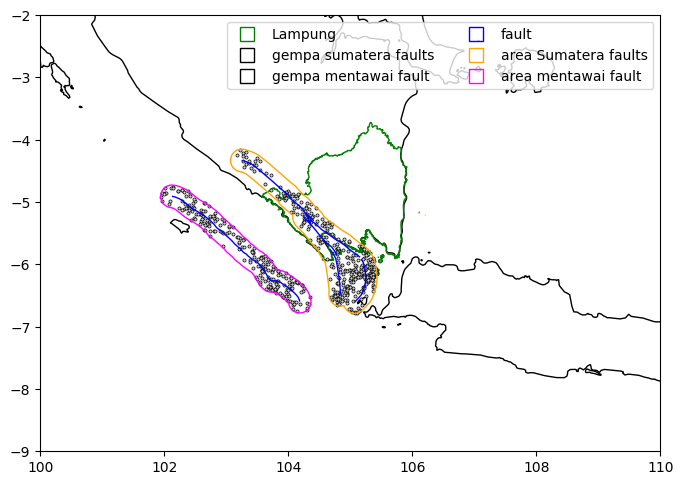

In [4]:
# open faults
gdf_faults = gpd.read_file('./shp/faults.shp')

# open area faults
gdf_area_sumatera_faults = gpd.read_file('./shp_output/area_sumatera_faults/area_sumatera_faults.shp')
gdf_area_mentawai_fault = gpd.read_file('./shp_output/area_mentawai_fault/area_mentawai_fault.shp')

# matplotlib
fig, ax = plt.subplots(figsize=(8,8))

# plot basemap
shp_coast.plot(color='none', edgecolor='black', linewidth=1, ax=ax, label='coastlines')

# plot Provinsi Lampung
gdf_lampung.plot(color='none', edgecolor='green', linewidth=1, ax=ax, label='Lampung')

# plot katalog
ax.scatter(dict_catalogue_area_sumatera_fault['longitude'], 
           dict_catalogue_area_sumatera_fault['latitude'], 
           c='lightgrey', s=5, edgecolors='black', linewidths=0.5, 
           label='gempa sumatera faults')

ax.scatter(dict_catalogue_area_mentawai_fault['longitude'], 
           dict_catalogue_area_mentawai_fault['latitude'], 
           c='lightgrey', s=5, edgecolors='black', linewidths=0.5, 
           label='gempa mentawai fault')

# plot faults
gdf_faults.plot(color='blue', linewidth=1, ax=ax, label='fault')

# plot area sumatera faults
gdf_area_sumatera_faults.plot(color='none', edgecolor='orange', linewidth=1, ax=ax, label='area Sumatera faults')

# plot area mentawai fault
gdf_area_mentawai_fault.plot(color='none', edgecolor='magenta', linewidth=1, ax=ax, label='area mentawai fault')

# tambahkan legenda, set batas koordinat, show
lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, 
           markeredgecolor=t.get_edgecolor(), markerfacecolor='none')
    for t in ax.collections[1:]
]
labels = [t.get_label() for t in ax.collections[1:]]
ax.legend(lines, labels, ncols=2)
ax.set_ylim((-9, -2))
ax.set_xlim((100, 110))
plt.show()

# menyimpan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)
fig.savefig(os.path.join(dir_figs, 'area_faults.png'), dpi=300)

## 4. Megathrust

In [5]:
dict_catalogue_megathrust_1 = open_pkl("dict_catalogue_megathrust_1.pkl")
dict_catalogue_megathrust_2 = open_pkl("dict_catalogue_megathrust_2.pkl")

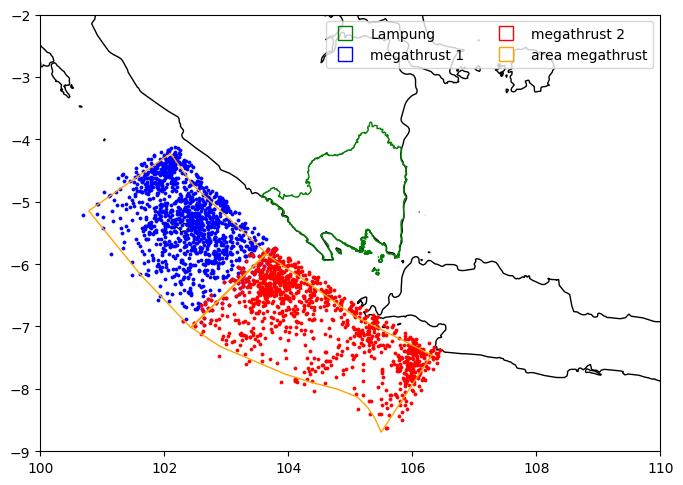

In [6]:
# open megathrust
gdf_megathrusts = gpd.read_file('./shp/megathrusts.shp')

# matplotlib
fig, ax = plt.subplots(figsize=(8,8))

# plot basemap
shp_coast.plot(color='none', edgecolor='black', linewidth=1, ax=ax, label='coastlines')

# plot Provinsi Lampung
gdf_lampung.plot(color='none', edgecolor='green', linewidth=1, ax=ax, label='Lampung')

# plot katalog
ax.scatter(dict_catalogue_megathrust_1['longitude'], 
           dict_catalogue_megathrust_1['latitude'], 
           c='blue', s=5, edgecolors='blue', linewidths=0.5, 
           label='megathrust 1')

ax.scatter(dict_catalogue_megathrust_2['longitude'], 
           dict_catalogue_megathrust_2['latitude'], 
           c='red', s=5, edgecolors='red', linewidths=0.5, 
           label='megathrust 2')

# plot megathrusts
gdf_megathrusts.plot(color='none', edgecolor='orange', linewidth=1, ax=ax, label='area megathrust')

# tambahkan legenda, set batas koordinat, show
lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, 
           markeredgecolor=t.get_edgecolor(), markerfacecolor='none')
    for t in ax.collections[1:]
]
labels = [t.get_label() for t in ax.collections[1:]]
ax.legend(lines, labels, ncols=2)
ax.set_ylim((-9, -2))
ax.set_xlim((100, 110))
plt.show()

# menyimpan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)
fig.savefig(os.path.join(dir_figs, 'area_megathrust.png'), dpi=300)

## 4. Shallow background

In [7]:
dict_catalogue_shallow_backgrounds_1 = open_pkl("dict_catalogue_shallow_backgrounds_1.pkl")

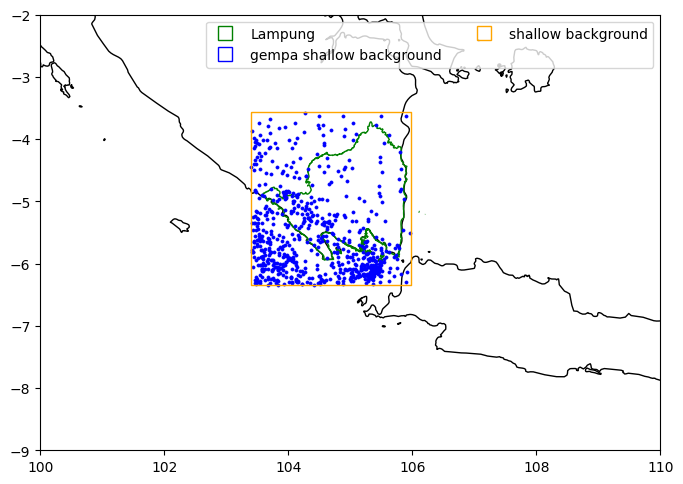

In [8]:
# open shallow background
gdf_shallow_background = gpd.read_file('./shp/shallow_background.shp')

# matplotlib
fig, ax = plt.subplots(figsize=(8,8))

# plot basemap
shp_coast.plot(color='none', edgecolor='black', linewidth=1, ax=ax, label='coastlines')

# plot Provinsi Lampung
gdf_lampung.plot(color='none', edgecolor='green', linewidth=1, ax=ax, label='Lampung')

# plot katalog
ax.scatter(dict_catalogue_shallow_backgrounds_1['longitude'], 
           dict_catalogue_shallow_backgrounds_1['latitude'], 
           c='blue', s=5, edgecolors='blue', linewidths=0.5, 
           label='gempa shallow background')

# plot megathrusts
gdf_shallow_background.plot(color='none', edgecolor='orange', linewidth=1, ax=ax, label='shallow background')

# tambahkan legenda, set batas koordinat, show
lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, 
           markeredgecolor=t.get_edgecolor(), markerfacecolor='none')
    for t in ax.collections[1:]
]
labels = [t.get_label() for t in ax.collections[1:]]
ax.legend(lines, labels, ncols=2)
ax.set_ylim((-9, -2))
ax.set_xlim((100, 110))
plt.show()

# menyimpan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)
fig.savefig(os.path.join(dir_figs, 'area_shallow_background.png'), dpi=300)

## 4. Shallow background

In [9]:
range_list = list(range(50, 350, 100)) + [350]
dict_catalogue_deep_backgrounds = []
for j in range(len(range_list)-1):
    dict_catalogue_deep_backgrounds.append(
        open_pkl(f"dict_catalogue_deep_backgrounds_1_{range_list[j]}-{range_list[j+1]}.pkl")
    )

/var/folders/nm/jd9hzrq57k19r9vm8lk_3c4r0000gn/T/ipykernel_34407/3342509497.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(catalogue['longitude'],


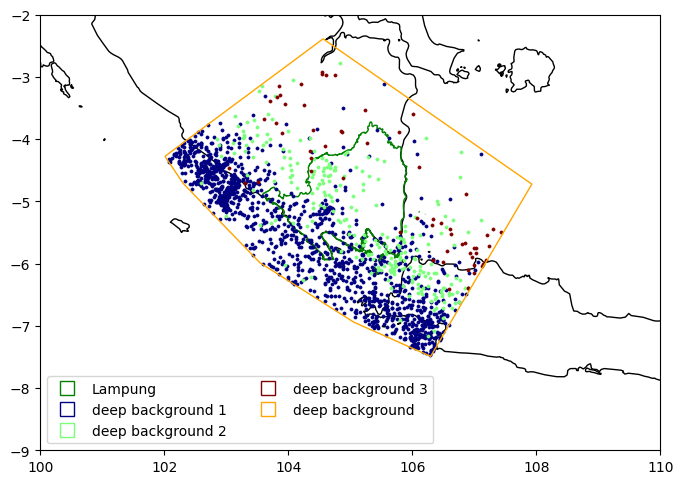

In [10]:
# open deep background (intraslab)
gdf_deep_background = gpd.read_file('./shp/deep_background.shp')

# matplotlib
fig, ax = plt.subplots(figsize=(8,8))

# plot basemap
shp_coast.plot(color='none', edgecolor='black', linewidth=1, ax=ax, label='coastlines')

# plot Provinsi Lampung
gdf_lampung.plot(color='none', edgecolor='green', linewidth=1, ax=ax, label='Lampung')

# plot katalog
cmap = get_cmap(len(dict_catalogue_deep_backgrounds))
for i, catalogue in enumerate(dict_catalogue_deep_backgrounds):
    ax.scatter(catalogue['longitude'], 
               catalogue['latitude'], 
               c=cmap(i), s=5, edgecolors=cmap(i), linewidths=0.5, 
               label=f'deep background {i+1}')

# plot deep background
gdf_deep_background.plot(color='none', edgecolor='orange', linewidth=1, ax=ax, label='deep background')

# tambahkan legenda, set batas koordinat, show
lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, 
           markeredgecolor=t.get_edgecolor(), markerfacecolor='none')
    for t in ax.collections[1:]
]
labels = [t.get_label() for t in ax.collections[1:]]
ax.legend(lines, labels, ncols=2)
ax.set_ylim((-9, -2))
ax.set_xlim((100, 110))
plt.show()

# menyimpan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)
fig.savefig(os.path.join(dir_figs, 'area_deep_background.png'), dpi=300)